In [10]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as pyplot
from matplotlib import style
import pickle

data = pd.read_csv('dataset/student-mat.csv', sep = ';')
print(data.describe())

              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.9988

In [11]:
data = data[['G1', 'G2', 'G3', 'studytime', 'failures', 'absences']]

print(data.head)

<bound method NDFrame.head of      G1  G2  G3  studytime  failures  absences
0     5   6   6          2         0         6
1     5   5   6          2         0         4
2     7   8  10          2         3        10
3    15  14  15          3         0         2
4     6  10  10          2         0         4
..   ..  ..  ..        ...       ...       ...
390   9   9   9          2         2        11
391  14  16  16          1         0         3
392  10   8   7          1         3         3
393  11  12  10          1         0         0
394   8   9   9          1         0         5

[395 rows x 6 columns]>


In [12]:
predict = 'G3'
x = np.array(data.drop([predict], 1))
y = np.array(data[predict])
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1)

C:\Users\User\AppData\Local\Temp\ipykernel_12872\3672135982.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(data.drop([predict], 1))


In [13]:
best = 0
for nothing in range(30):
    linear = linear_model.LinearRegression()
    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)

    print(acc)
    if acc > best:
        best = acc

0.8115417101296699
0.8115417101296699
0.8115417101296699
0.8115417101296699
0.8115417101296699
0.8115417101296699
0.8115417101296699
0.8115417101296699
0.8115417101296699
0.8115417101296699
0.8115417101296699
0.8115417101296699
0.8115417101296699
0.8115417101296699
0.8115417101296699
0.8115417101296699
0.8115417101296699
0.8115417101296699
0.8115417101296699
0.8115417101296699
0.8115417101296699
0.8115417101296699
0.8115417101296699
0.8115417101296699
0.8115417101296699
0.8115417101296699
0.8115417101296699
0.8115417101296699
0.8115417101296699
0.8115417101296699


In [14]:
print(best)

0.8115417101296699


In [15]:
with open('studentmodel.pickle', 'wb') as f:
    pickle.dump(linear, f)
    
pickle_in = open('studentmodel.pickle', 'rb')
linear = pickle.load(pickle_in)

In [16]:
print("Coeficient   :", linear.coef_)
print("Intercept    :", linear.intercept_)

Coeficient   : [ 0.13017732  0.98168862 -0.23852886 -0.30656776  0.03669325]
Intercept    : -1.1056259393898191


In [17]:
predictions = linear.predict(x_test)

for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])

8.701060105911347 [10  9  2  0  4] 11
12.944960051140592 [13 13  2  0  2] 13
11.306280794078072 [10  9  2  0 75] 9
8.21460001500577 [ 9  9  2  2 11] 9
9.036601462005297 [10  9  3  1 28] 9
13.408725423746397 [15 14  3  2  4] 15
-0.7394813468542755 [7 0 1 1 0] 0
15.005277765582752 [16 15  4  0  7] 17
6.07020059638682 [6 7 2 0 0] 0
7.312243852890864 [8 8 2 0 0] 0
5.961849049039699 [7 7 3 0 0] 8
10.409312809032905 [11 11  3  0  0] 10
14.295354854991757 [14 14  1  0  2] 14
11.937380970579824 [14 11  1  0 18] 13
14.407162802419291 [15 14  2  0  8] 14
6.629295750220818 [ 7  8  2  3 10] 10
9.422394096392418 [ 8 10  2  0  4] 9
9.574397182056783 [11 10  3  0  4] 10
8.44070547289986 [8 9 2 0 4] 10
8.361373011522206 [ 9  9  2  2 15] 9
9.869716864157175 [12 10  2  0  2] 11
-0.8722202511830839 [12  0  3  2  0] 0
4.038784454102771 [6 5 1 1 0] 0
3.7322166949509743 [6 5 1 2 0] 0
9.297446869034605 [10 10  3  0  0] 9
11.407597112536155 [10 12  3  0  4] 12
11.843671803249505 [15 12  2  1  0] 12
9.12478341

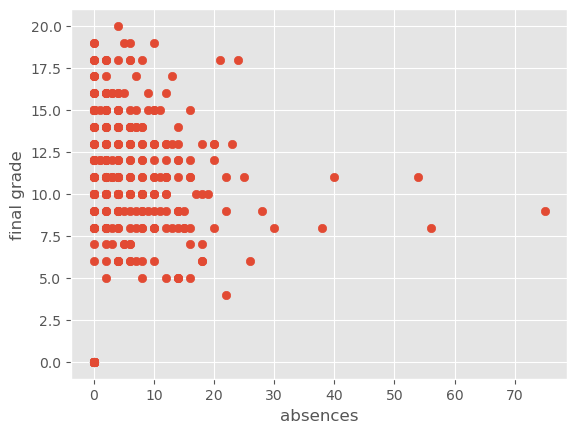

In [18]:
p = "absences"
style.use('ggplot')
pyplot.scatter(data[p], data["G3"])
pyplot.xlabel(p)
pyplot.ylabel("final grade")
pyplot.show()